In [104]:
import pandas as pd
import os
from plotnine import ggplot, aes, geom_line, geom_boxplot, geom_bar, stat_bin, xlim, ylim
from scipy.stats import spearmanr
from sklearn.feature_extraction.text import TfidfVectorizer
from string import digits, punctuation


### 1.1 Загрузка данных

In [2]:
files = os.listdir('data/')

In [3]:
files[:5]

['reviews_argentina.csv',
 'reviews_lebanon.csv',
 'reviews_croatia.csv',
 'reviews_china.csv',
 'reviews_bosnia_and_herzegovina.csv']

In [4]:
df = pd.concat([pd.read_csv('data/'+file, sep = ';') for file in files], ignore_index=True)

In [5]:
df

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
0,119966,Argentina,Raspberry and cassis aromas are fresh and upri...,Pedernal,90,43.0,Other,San Juan,Michael Schachner,Finca Las Moras 2010 Pedernal Malbec (San Juan),Malbec,Finca Las Moras
1,119956,Argentina,Compared to the regular 2006 Malbec from Chaka...,Reserve,91,25.0,Mendoza Province,Luján de Cuyo,Michаеl Schаchnеr,Chakana 2006 Reserve Malbec (Luján de Cuyo),Malbec,Chakana
2,119950,Argentina,Andeluna's top wines tend to be ripe and plump...,Pasionado,91,55.0,Mendoza Province,Uco Valley,Michael Schachner,Andeluna 2004 Pasionado Red (Uco Valley),Red Blend,Andeluna
3,119943,Argentina,"A lively, well-made blend of Tempranillo, Malb...",B Crux,91,24.0,Mendoza Province,Uco Valley,Michаel Schаchner,O. Fournier 2005 B Crux Red (Uco Valley),Red Blend,O. Fournier
4,119939,Argentina,There is a select group of under-$20 Malbecs f...,La Madras Vineyard,91,18.0,Mendoza Province,Mendoza,Michаеl Schаchnеr,Ricardo Santos 2006 La Madras Vineyard Malbec ...,Malbec,Ricardo Santos
...,...,...,...,...,...,...,...,...,...,...,...,...
149903,31,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,Rоger Vоss,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
149904,12,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,Roger Voss,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
149905,10,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
149906,8,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149908 entries, 0 to 149907
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   entry_id     149908 non-null  int64  
 1   country      149908 non-null  object 
 2   description  149908 non-null  object 
 3   designation  106749 non-null  object 
 4   points       149908 non-null  int64  
 5   price        139418 non-null  float64
 6   province     149908 non-null  object 
 7   region       125516 non-null  object 
 8   taster_name  118829 non-null  object 
 9   title        149908 non-null  object 
 10  variety      149906 non-null  object 
 11  winery       149908 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 13.7+ MB


### 1.2 Очистка данных

In [25]:
df.duplicated('title').sum()

31127

In [42]:
df.duplicated('description').sum()

30012

In [8]:
df.duplicated('entry_id').sum()

29979

In [9]:
df.duplicated().sum()

15847

In [10]:
df.groupby('description')['entry_id'].value_counts().sort_values()

description                                                                                                                                                                                                                                                                                                                                                             entry_id
"Chremisa," the ancient name of Krems, is commemorated in this wine that comes from Krems vineyards. It has tight, tangy apple-driven acidity, with a bright, light, citrusy character. Not for aging.                                                                                                                                                                  89106       1
Subtle notes of tart red apple and red currant rise from the glass. They also feature prominently on the palate where their fruit expression is heightened by lively fine fizz. The body is light and inherently fresh, making this an ideal and very appetizing 

In [16]:
df.groupby('entry_id')['description'].value_counts().sort_values()

entry_id  description                                                                                                                                                                                                                                                                                              
59997     Baga can be a shock to the palate because of its tannins. But this wine seems to have fruitiness to offset the intense, dry texture. It shows black currant and herb flavors, which come laden with spice on the finish.                                                                                     1
63011     After starting out reduced, this cool-vintage blend of Merlot (43%), Cabernet Franc (32%), Malbec (33%) and Mourvèdre offers cranberry, herbs and chocolate. It's soft and easy drinking—a surprise given the structure often seen in this appellation—with chocolate and cherry flavors taking the lead.    1
104278    Aromas of vanilla, mocha, dried herbs, pencil lead and f

In [13]:
df.title.value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                                       11
Segura Viudas NV Extra Dry Sparkling (Cava)                                                  10
Thiénot NV Brut  (Champagne)                                                                  9
Ruinart NV Brut Rosé  (Champagne)                                                             9
Pommery NV Brut Royal  (Champagne)                                                            8
                                                                                             ..
Lichen Estate 2015 Moonglow Pinot Noir (Anderson Valley)                                      1
Martin Ranch 2014 J.D. Hurley Carignane (Santa Clara Valley)                                  1
Maryhill 2015 Proprietor's Reserve Tudor Hills Vineyard Chardonnay (Columbia Valley (WA))     1
Mercer 2014 Malbec (Horse Heaven Hills)                                                       1
Alba 2005 Dry Riesling (New Jersey)     

In [11]:
df[df['title'] == 'Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)']

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
16346,113399,US,This bubbly is rich in cherry and raspberry fr...,Sonoma Brut,86,20.0,California,Sonoma County,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
22511,101980,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
22512,101980,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Virginiе Bооnе,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
26460,94739,US,"A good, dry and elegant bubbly. Shows crisp fl...",Sonoma Brut,89,20.0,California,Sonoma County,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
29502,89072,US,"A bit rough and scouring in texture, this tast...",Sonoma Brut,85,20.0,California,Sonoma County,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
35659,77448,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
35660,77448,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
44452,60696,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Virginiе Bооnе,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
61784,27354,US,A wonderfully drinkable sparkling wine that ap...,Sonoma Brut,90,20.0,California,Sonoma County,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
73612,4385,US,"Made predominantly from Pinot Noir, this is an...",Sonoma Brut,88,22.0,California,Sonoma County,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer


Дупликаты определяем по description

In [15]:
df[df['entry_id'] == 102849]

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
127997,102849,France,"“Today, as in the past,” reads the title of th...",Aujourd'hui comme Autrefois,92,28.0,Loire Valley,Sancerre,Rоger Vоss,Hubert Brochard 2012 Aujourd'hui comme Autrefo...,Sauvignon Blanc,Hubert Brochard
127998,102849,France,"“Today, as in the past,” reads the title of th...",Aujourd'hui comme Autrefois,92,28.0,Loire Valley,Sancerre,Rоger Vоss,Hubert Brochard 2012 Aujourd'hui comme Autrefo...,Sauvignon Blanc,Hubert Brochard


In [20]:
df[df['entry_id'] == 119988]

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
124469,119988,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,Rоgеr Vоss,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit
124470,119988,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,Roger Voss,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [21]:
df[df['entry_id'] == 3016]

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
74363,3016,US,“Rhône times three” seems to be the code name ...,Rx-3 Red Wine,92,30.0,Washington,Columbia Valley (WA),Paul Gregutt,Nefarious 2010 Rx-3 Red Wine Red (Columbia Val...,Rhône-style Red Blend,Nefarious
74364,3016,US,“Rhône times three” seems to be the code name ...,Rx-3 Red Wine,92,30.0,Washington,Columbia Valley (WA),Pаul Grеgutt,Nefarious 2010 Rx-3 Red Wine Red (Columbia Val...,Rhône-style Red Blend,Nefarious


In [50]:
df.groupby('description').value_counts()

description                                                                                                                                                                                                                                                                                                                                                                                                                 entry_id  country  designation                                  points  price  province        region                taster_name         title                                                                                              variety                winery         
). Earth, cola and leather aromas are good, however the fruit portion of the bouquet is a bit damp and roasted. The palate is hard and rugged, with driving cherry and plum flavors. Earthy and herbal on the finish.                                                                                                    

In [7]:
df['taster_name'].isnull().sum()

31079

In [8]:
df['taster_name'] = df['taster_name'].apply(lambda x: str(x).translate(str.maketrans('аео', 'aeo')))

In [9]:
df.duplicated().sum()

29979

In [10]:
df.duplicated('entry_id').sum()

29979

In [54]:
df.description.value_counts().sort_values()[-25:]

Here's an unusual white from Sicily made with red Nero d'Avola grapes. It has a subdued floral fragrance and a linear palate showing citrus notes, white pepper and bracing acidity.                                                                                                                                       2
The aromas in this juicy Dolcetto suggest black cherry, violet and toasted almond while the palate offers ripe blackberry, white pepper and clove flavors. Rounded tannins provide support. Enjoy soon.                                                                                                                    2
Doesn't taste fully ripe, with a wintergreen, minty edge to the raspberries and cherries. Sugary sweet in the finish, too. Shows the difficulties of this extremely cool vintage.                                                                                                                                          2
92–94. Barrel sample. With so much spicy fruit, i

In [40]:
df[df['description'] == 'Rose, red berry, mint and anise aromas unfold in the glass. The firm palate offers wild cherry, crushed raspberry, clove, anisette and a mocha note framed in bracing tannins and fresh acidity. Drink 2020–2031.']

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
92859,79217,Italy,"Rose, red berry, mint and anise aromas unfold ...",NaN,90,29.0,Piedmont,Barolo,Kerin O’Keefe,Oddero 2011 Barolo,Nebbiolo,Oddero
92860,79217,Italy,"Rose, red berry, mint and anise aromas unfold ...",NaN,90,29.0,Piedmont,Barolo,Kerin O’Keefe,Oddero 2011 Barolo,Nebbiolo,Oddero
92911,78999,Italy,"Rose, red berry, mint and anise aromas unfold ...",NaN,92,64.0,Piedmont,Barolo,Kerin O’Keefe,Cascina Bongiovanni 2011 Barolo,Nebbiolo,Cascina Bongiovanni
92912,78999,Italy,"Rose, red berry, mint and anise aromas unfold ...",NaN,92,64.0,Piedmont,Barolo,Kerin O’Keefe,Cascina Bongiovanni 2011 Barolo,Nebbiolo,Cascina Bongiovanni


In [44]:
df[df['description'] == 'Aromas of citrus, melon and orange blossom start this crisp, elegant white from Cephalonia. On the palate, bright flavors of lemon/lime and white peach are balanced with a stony minerality. A beautiful example of an ancient indigenous variety.']

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
116585,115744,Greece,"Aromas of citrus, melon and orange blossom sta...",NaN,89,22.0,Cephalonia,NaN,Susan Kostrzewa,Gentilini 2015 Robola (Cephalonia),Robola,Gentilini
116957,32876,Greece,"Aromas of citrus, melon and orange blossom sta...",NaN,88,15.0,Atalanti Valley,NaN,Susan Kostrzewa,Hatzimichalis 2015 Chardonnay (Atalanti Valley),Chardonnay,Hatzimichalis
116958,32876,Greece,"Aromas of citrus, melon and orange blossom sta...",NaN,88,15.0,Atalanti Valley,NaN,Susan Kostrzewa,Hatzimichalis 2015 Chardonnay (Atalanti Valley),Chardonnay,Hatzimichalis


In [55]:
df[df['description'] == 'This wine shows some of the less appealing aspects of American oak: overt spice and vanilla flavors and a slick, oily mouthfeel.']

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
55673,39026,US,This wine shows some of the less appealing asp...,Hargrave Vineyard,82,14.0,New York,North Fork of Long Island,Joe Czerwinski,Castello di Borghese 1998 Hargrave Vineyard C...,Chardonnay,Castello di Borghese
55676,39021,US,This wine shows some of the less appealing asp...,NaN,82,14.0,New York,North Fork of Long Island,Joe Czerwinski,Hargrave 1998 Chardonnay (North Fork of Long I...,Chardonnay,Hargrave
55677,39021,US,This wine shows some of the less appealing asp...,NaN,82,14.0,New York,North Fork of Long Island,Joe Czerwinski,Hargrave 1998 Chardonnay (North Fork of Long I...,Chardonnay,Hargrave


In [11]:
df = df.drop_duplicates()

In [12]:
df

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
0,119966,Argentina,Raspberry and cassis aromas are fresh and upri...,Pedernal,90,43.0,Other,San Juan,Michael Schachner,Finca Las Moras 2010 Pedernal Malbec (San Juan),Malbec,Finca Las Moras
1,119956,Argentina,Compared to the regular 2006 Malbec from Chaka...,Reserve,91,25.0,Mendoza Province,Luján de Cuyo,Michael Schachner,Chakana 2006 Reserve Malbec (Luján de Cuyo),Malbec,Chakana
2,119950,Argentina,Andeluna's top wines tend to be ripe and plump...,Pasionado,91,55.0,Mendoza Province,Uco Valley,Michael Schachner,Andeluna 2004 Pasionado Red (Uco Valley),Red Blend,Andeluna
3,119943,Argentina,"A lively, well-made blend of Tempranillo, Malb...",B Crux,91,24.0,Mendoza Province,Uco Valley,Michael Schachner,O. Fournier 2005 B Crux Red (Uco Valley),Red Blend,O. Fournier
4,119939,Argentina,There is a select group of under-$20 Malbecs f...,La Madras Vineyard,91,18.0,Mendoza Province,Mendoza,Michael Schachner,Ricardo Santos 2006 La Madras Vineyard Malbec ...,Malbec,Ricardo Santos
...,...,...,...,...,...,...,...,...,...,...,...,...
149902,43,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,Roger Voss,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy
149903,31,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,Roger Voss,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
149904,12,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,Roger Voss,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
149905,10,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [65]:
df.description.value_counts().sort_values()[-34:]

This fruity, sweet wine is immediately attractive and ripe. With its great apricot and pineapple fruit, hints of spicy wood and balancing acidity, it's perfect as an apéritif—light and refreshing. Drink now.                                                                                                            1
Almost too much of a good thing, Passo is a thick, jammy and modern blend of traditional Italian grapes and international varieties such as Cabernet Sauvignon and Merlot. This is a bold, big wine with a thick, chewy mouthfeel that should be paired with aged cheese or succulent meat.                                2
Hugely delicious, just a joy to drink. So soft and velvety, so rich in blackberry jam, cassis and chocolate flavors, with the tannins so smooth and round. Really wonderful over the next few years, although the softness and high alcohol suggest it's not an ager.                                                      2
Subtle aromas of acacia flower and a whiff of alm

In [66]:
df[df['description'] == 'In 2009 this single vineyard offering includes 11% Sémillon. It has wonderful texture, and a mix of light herbal flavors that run through a gamut from celery to lemongrass and up into tart citrus fruit. The acidity is generous but not searing; it penetrates but never overpowers. A quintessential food wine.']

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
6226,49851,Australia,In 2009 this single vineyard offering includes...,Noble Baron,90,50.0,South Australia,Barossa,Joe Czerwinski,Château Tanunda 2007 Noble Baron Cabernet Sauv...,Cabernet Sauvignon,Château Tanunda
46200,57238,US,In 2009 this single vineyard offering includes...,Horse Heaven Vineyard,90,15.0,Washington,Horse Heaven Hills,Paul Gregutt,Chateau Ste. Michelle 2009 Horse Heaven Vineya...,Sauvignon Blanc,Chateau Ste. Michelle


In [67]:
df.isnull().sum()

entry_id           0
country            0
description        0
designation    34535
points             0
price           8391
province           0
region         19501
taster_name        0
title              0
variety            1
winery             0
dtype: int64

In [71]:
df[df['price'].isnull()]

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
28,119527,Argentina,"Slightly tart and like rhubarb at first, but i...",Aduentus Classic,85,NaN,Mendoza Province,Mendoza,Michael Schachner,Antigal 2006 Aduentus Classic Red (Mendoza),Red Blend,Antigal
69,118289,Argentina,A lot of raisin and licorice on the nose hint ...,Alberto Furque,86,NaN,Mendoza Province,Uco Valley,Michael Schachner,Bodega Aconquija 2006 Alberto Furque Syrah (Uc...,Syrah,Bodega Aconquija
128,116354,Argentina,Plum and light green aromas define the nose on...,Made With Organically Grown Grapes,86,NaN,Mendoza Province,Tupungato,Michael Schachner,Domaine Jean Bousquet 2012 Made With Organical...,Cabernet Sauvignon,Domaine Jean Bousquet
173,115094,Argentina,"Cool, earthy black-fruit aromas hint at leathe...",Blend of Malbecs,90,NaN,Mendoza Province,Mendoza,Michael Schachner,Vicentin 2013 Blend of Malbecs Malbec (Mendoza),Malbec,Vicentin
259,113479,Argentina,"Berry aromas come with a hint of cheesy oak, s...",Killka Collection,87,NaN,Mendoza Province,Mendoza,Michael Schachner,Salentein 2011 Killka Collection Malbec (Mendoza),Malbec,Salentein
...,...,...,...,...,...,...,...,...,...,...,...,...
149862,318,France,"Soft, ripe, dominated by peaches, pears and a ...",NaN,86,NaN,Bordeaux,Bordeaux Blanc,Roger Voss,Château Tour de Mirambeau 2006 Bordeaux Blanc,Bordeaux-style White Blend,Château Tour de Mirambeau
149864,317,France,An intriguing blend of Sauvignon Blanc and Mus...,Les Amants Mont-Pérat,86,NaN,Bordeaux,Bordeaux Blanc,Roger Voss,Château Mont-Pérat 2008 Les Amants Mont-Pérat ...,Bordeaux-style White Blend,Château Mont-Pérat
149867,291,France,This is a wine that has great potential—you ca...,NaN,92,NaN,Bordeaux,Saint-Estèphe,Roger Voss,Château Lafon-Rochet 2011 Saint-Estèphe,Bordeaux-style Red Blend,Château Lafon-Rochet
149877,164,France,Produced from vineyards donated to a charitabl...,Hospices Civils de Romanèche Thurins,91,NaN,Beaujolais,Moulin-à-Vent,Roger Voss,Collin-Bourisset 2011 Hospices Civils de Roman...,Gamay,Collin-Bourisset


In [74]:
df[df['designation']=='Aduentus Classic']

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
28,119527,Argentina,"Slightly tart and like rhubarb at first, but i...",Aduentus Classic,85,NaN,Mendoza Province,Mendoza,Michael Schachner,Antigal 2006 Aduentus Classic Red (Mendoza),Red Blend,Antigal
2760,45407,Argentina,"Hedonistic berry, raisin and fig flavors are c...",Aduentus Classic,93,28.0,Mendoza Province,Mendoza,Michael Schachner,Antigal 2010 Aduentus Classic Red (Mendoza),Red Blend,Antigal


Топ-5 авторов по числу отзывов:

In [135]:
df['taster_name'].value_counts()[1:6]

taster_name
Roger Voss           23558
Michael Schachner    14039
Kerin O’Keefe         9697
Paul Gregutt          8867
Virginie Boone        8708
Name: count, dtype: int64

Всего авторов 20:

In [82]:
len(df['taster_name'].unique())

20

### 1.3 Эксплораторный анализ

In [83]:
df['points'].mean()

88.44214493575366

In [84]:
df['points'].median()

88.0

In [85]:
df['points'].std()

3.0932746182685547

In [86]:
df['price'].mean()

35.6261094873496

In [87]:
df['price'].median()

25.0

In [88]:
df['price'].std()

42.11291028863017

In [14]:
df_new = df.dropna(subset=['points','price'])

In [102]:
#df_new['points'].std()

3.099229514464659

In [98]:
#len(df)-len(df_new) #стереть

8391

Так как переменная points измеряется по ранговой шкале, а price по интервальной, то будем вычислять коэффициент корреляции Спирмена:

In [17]:
spearmanr(df_new['points'], df_new['price'])

SpearmanrResult(correlation=0.6124750550158435, pvalue=0.0)

In [67]:
df_90 = df[df.points >= 90]

In [81]:
df_90.groupby(by=['country','winery'])['designation'].value_counts().sort_values()

country   winery            designation                
Portugal  Provam            Contradição                     1
US        Balletto          Winery Block Estate             1
          Ballentine        Pocai Vineyard Estate Grown     1
                            Pocai Vineyard                  1
                            Estate Grown Old Vines          1
                                                           ..
France    Joseph Cattin     Hatschbourg Grand Cru          16
US        Raymond           District Collection            17
France    Roche de Bellene  Vieilles Vignes                17
          Tardieu-Laurent   Vieilles Vignes                18
US        Novelty Hill      Stillwater Creek Vineyard      33
Name: count, Length: 23367, dtype: int64

In [105]:
words = list(df_90['description'].apply(lambda x: str(x).translate(x.maketrans('','',digits+punctuation))))

In [107]:
words[:10]

['Raspberry and cassis aromas are fresh and upright while showing wiry grassy accents Full bodied this features a jammy pulpy palate thats fresh but low on definition Herbal lightly green infiltrations drift onto a solid tannic finish Drink through ',
 'Compared to the regular  Malbec from Chakana this wine steps up in weight class and wins the crown Its a serious but inviting red with spongey ripe berry aromas topped by pure raspberry cherry and cola flavors Its both racy and composed with a pile of bitter chocolate on the long finish Good through  at least',
 'Andelunas top wines tend to be ripe and plump and so they come across as easy to drink and less demanding This blend of Malbec Cabernet Sauvignon Merlot and Cabernet Franc is devoid of astringency and hard tannins Its ripe just a little rugged and integrated such that the berry flavors are forward and dont need to fight to be appreciated',
 'A lively wellmade blend of Tempranillo Malbec and Syrah B Crux is a bouncy fresh youngs

In [128]:
vectorizer = TfidfVectorizer(input='content', ngram_range=(2,3), stop_words='english', max_features=50)

In [129]:
X = vectorizer.fit_transform(words)

In [130]:
vectorizer.get_feature_names_out()

array(['age drink', 'age years', 'baking spice', 'berry fruits',
       'black cherry', 'black currant', 'black fruit', 'black fruits',
       'black pepper', 'black plum', 'blend cabernet',
       'blend cabernet sauvignon', 'bright acidity', 'cabernet franc',
       'cabernet sauvignon', 'cherry fruit', 'crisp acidity',
       'dark chocolate', 'finegrained tannins', 'finish drink',
       'firm tannins', 'french oak', 'fresh acidity', 'fruit flavors',
       'green apple', 'lingering finish', 'long finish',
       'merlot cabernet', 'nose palate', 'palate delivers',
       'palate offers', 'petit verdot', 'pinot noir', 'ready drink',
       'red berry', 'red cherry', 'red fruit', 'red fruits', 'rich wine',
       'ripe black', 'ripe fruit', 'stone fruit', 'structured wine',
       'tannins drink', 'white peach', 'white pepper', 'wine offers',
       'wine rich', 'wine shows', 'wood aging'], dtype=object)

### 1.4 Визуализация данных

/home/nikinho/miniforge3/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 99'. Pick better value with 'binwidth'.


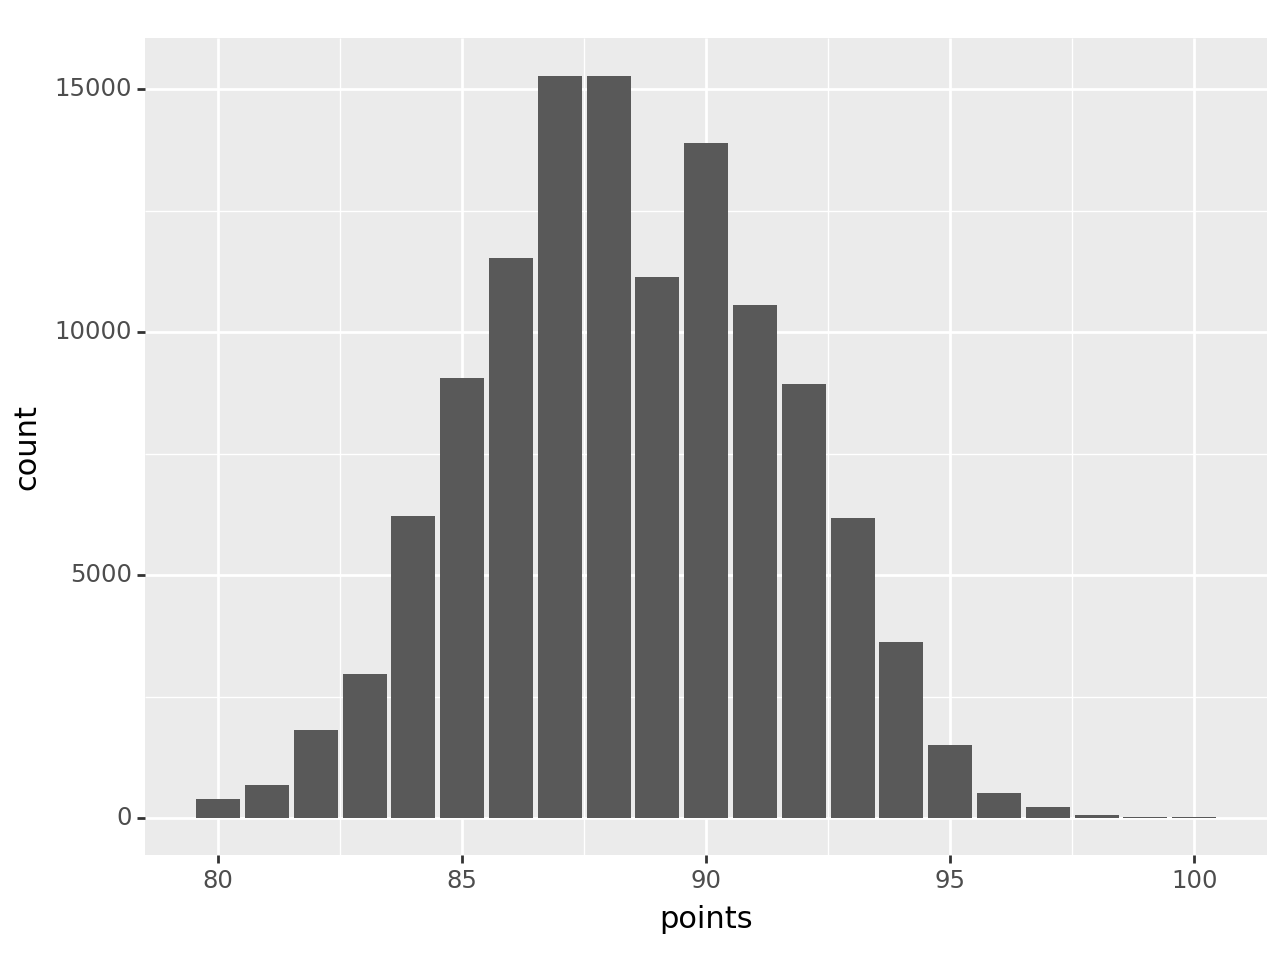

<Figure Size: (640 x 480)>

In [23]:
(
    ggplot(df)
    + aes(x='points')
    + stat_bin()
    +geom_bar()

)

/home/nikinho/miniforge3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 9056 rows containing non-finite values.
/home/nikinho/miniforge3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_count : Removed 9056 rows containing non-finite values.
/home/nikinho/miniforge3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/home/nikinho/miniforge3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


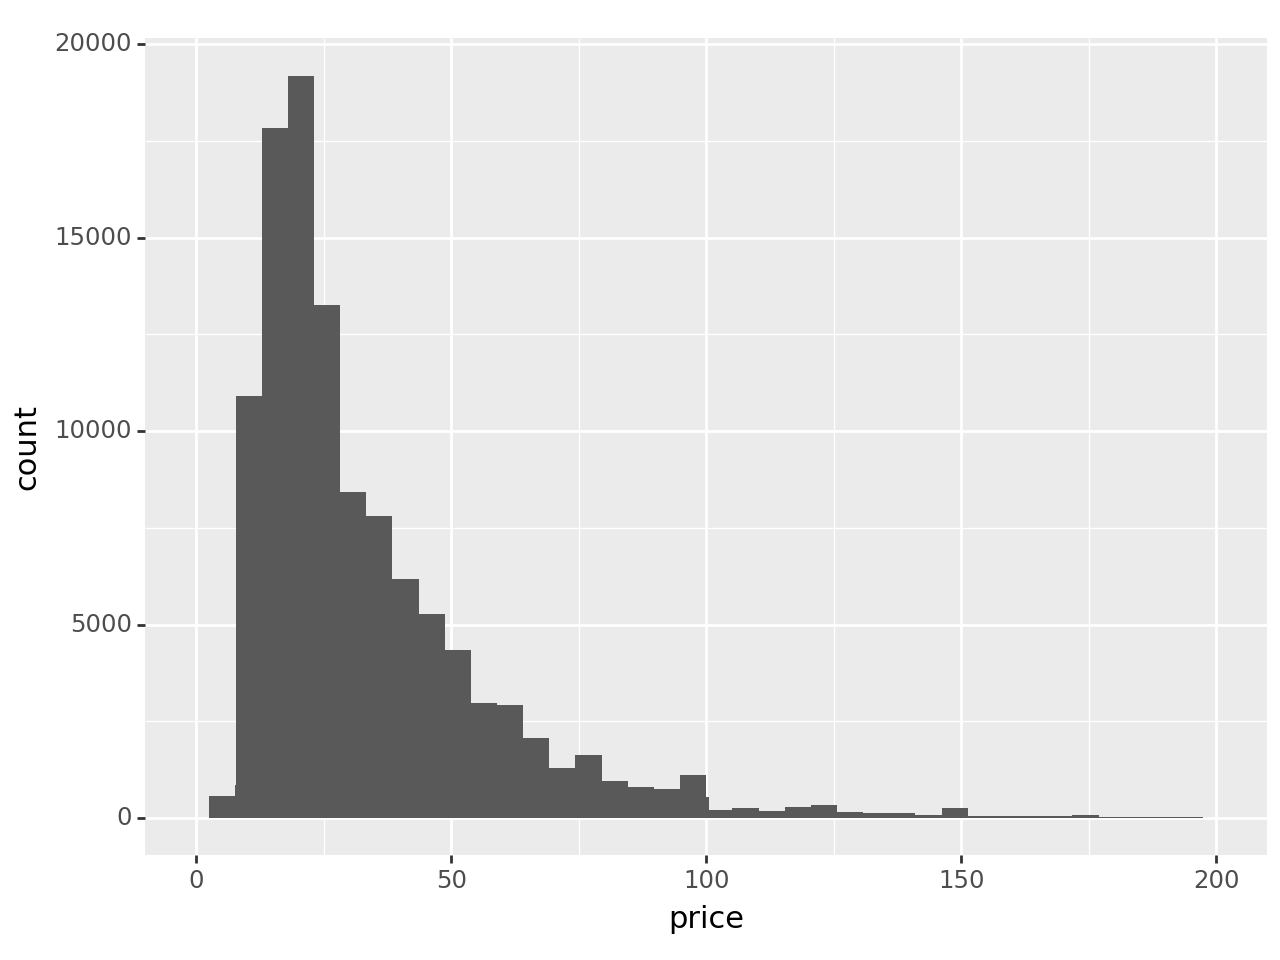

<Figure Size: (640 x 480)>

In [53]:
(
    ggplot(df)
    + aes(x='price')
    + stat_bin(bins=40) #(bins=80)
    +geom_bar()
    +xlim(0,200)

)

/home/nikinho/miniforge3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 665 rows containing non-finite values.


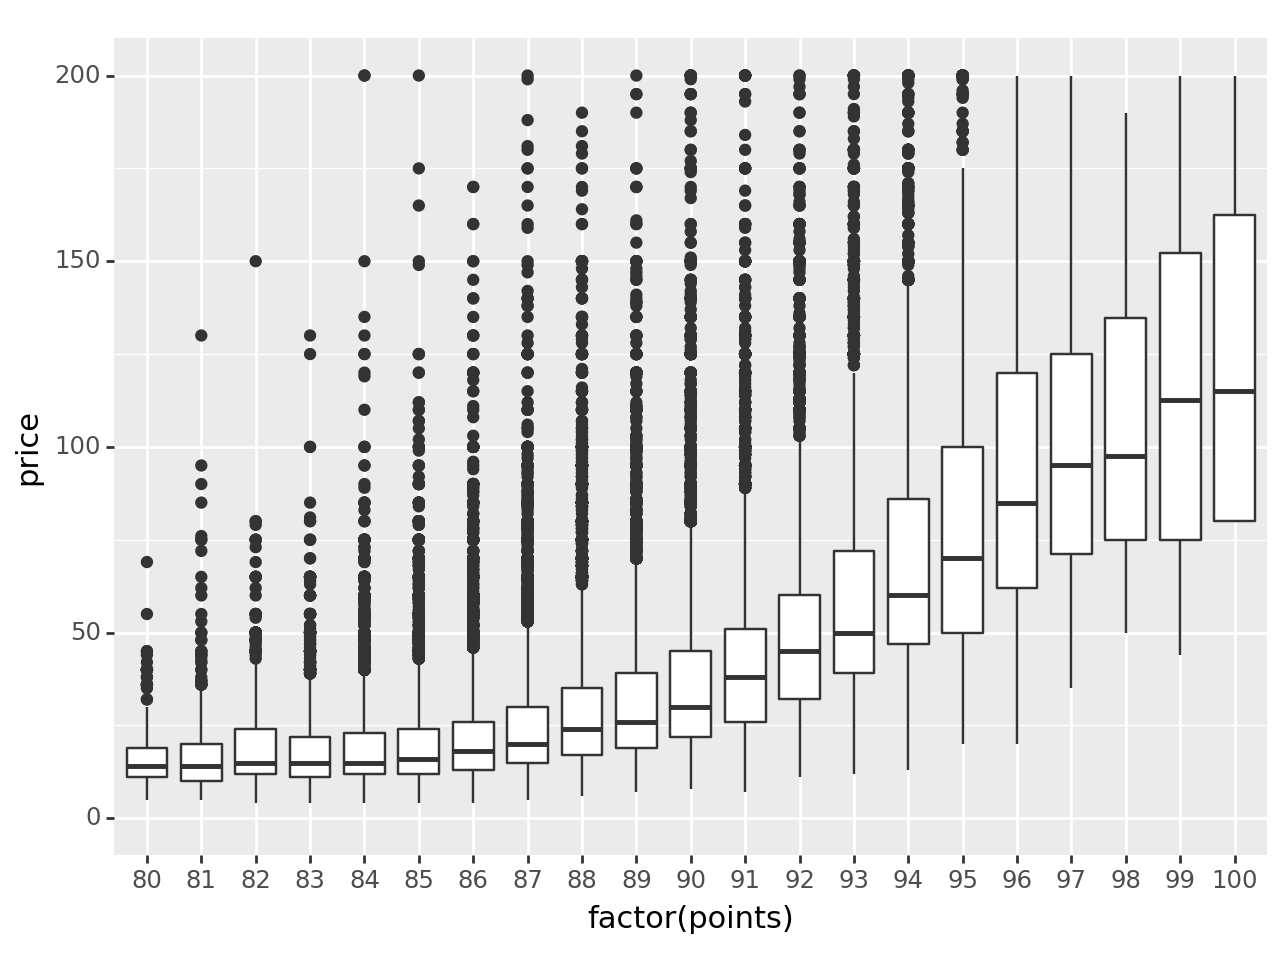

<Figure Size: (640 x 480)>

In [41]:
(
    ggplot(df_new)
    + aes(x='factor(points)', y='price')
    +geom_boxplot()
    +ylim(0, 200)

)